In [1]:
"""
Author:   Chuck Stewart
Course:   CSCI 4270 and 6270
Lecture:  02
File:     ex3_side_by_side.ipynb

Purpose: Combine two randomly selected images, showing them
side-by-side by creating a single scaled image. Save the result
to a file in the same folder as the original images.
"""

import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
import pathlib
import random
import sys

test_image_dir = "/Users/stewart/Dropbox/cv_2025_spring/test_images/kenya"

In [2]:
"""
Get two images at random from the test directory
"""
prev_wd = os.getcwd()
os.chdir(test_image_dir)

# Get the image file names
img_extensions = ['.jpg', '.jpeg', '.png']
img_list = os.listdir('./')
img_list = [name for name in img_list if pathlib.Path(name).suffix.lower() in img_extensions]
random.seed()

# Find two images, as desired
found = False
while not found:
    ii = random.randint(0, len(img_list) - 1)
    jj = random.randint(0, len(img_list) - 1)
    if ii == jj:
        continue
    print("ii = %d, jj = %d" % (ii, jj))
    img_i = cv2.imread(img_list[ii])
    img_j = cv2.imread(img_list[jj])
    print(img_i.shape)
    print(img_j.shape)
    found = img_i.shape == img_j.shape

# Convert to RGB, this time using OpenCV functions
img_i = cv2.cvtColor(img_i, cv2.COLOR_BGR2RGB)
img_j = cv2.cvtColor(img_j, cv2.COLOR_BGR2RGB)

# Go back to previous working directory
os.chdir(prev_wd)

ii = 22, jj = 17
(4000, 6000, 3)
(4000, 6000, 3)


In [3]:
"""
Set the width of each half of the output image and select the
height based on the aspect ratio of the images.
"""
out_width = 600
out_height = int(out_width * img_i.shape[0] / img_i.shape[1])

"""
Create resized output images
"""
out1 = cv2.resize(img_i, (out_width, out_height))
out2 = cv2.resize(img_j, (out_width, out_height))

"""
Here are two different methods for creating the output image.  One
creates an NumPy array of the appropriate size and inserts the output
image through slicing. The other uses concatenation. The second method
is preferred for being clearer and more compact.
"""
if True:
    out_img = np.zeros((out_height, 2*out_width, 3), dtype=img_i.dtype)
    out_img[:out_height, :out_width] = out1
    out_img[:out_height, out_width:] = out2
else:
    out_img = np.concatenate((out1, out2), axis=1)


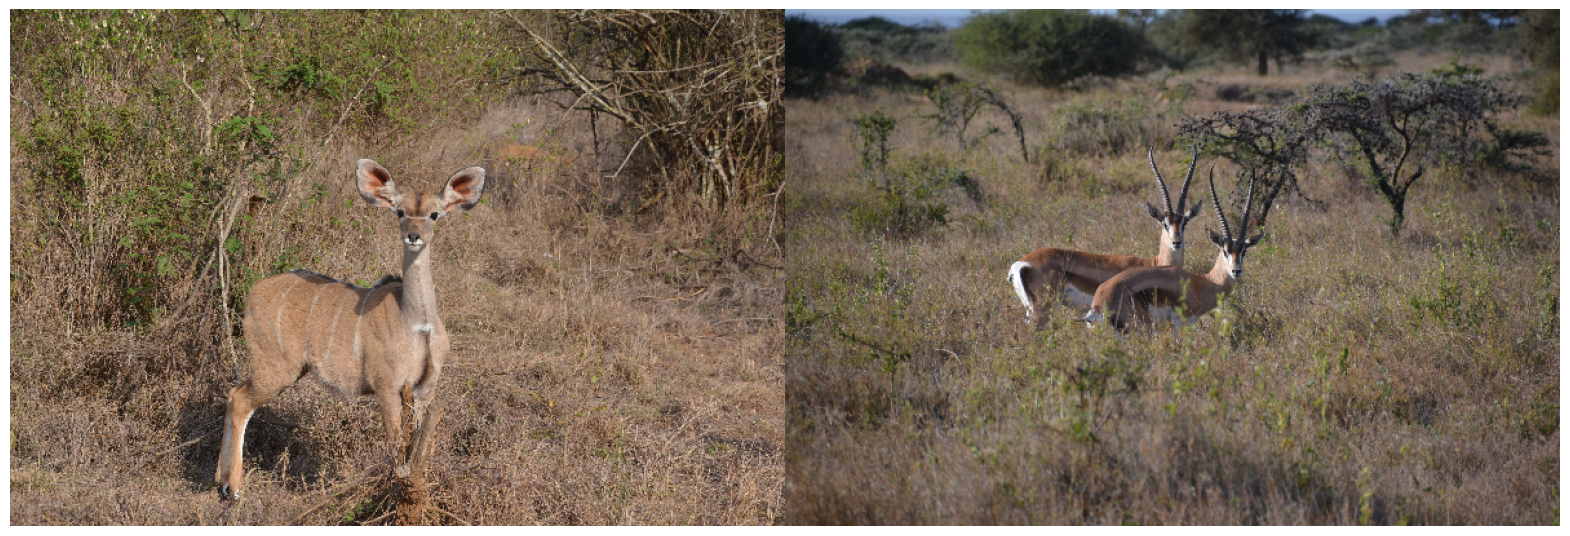

In [4]:
plt.figure(figsize = (20,20))
plt.axis("off")
plt.imshow(out_img)
plt.show()


In [5]:
"""
Finally, for the first time we are going to save the image to a file.
Note that the cv2.imwrite function assumes the image colors are in BGR
order, so we need to impose this order in the image we send it.
"""
name_ii = os.path.splitext(img_list[ii])[0]
name_ext = os.path.splitext(img_list[ii])[-1]
name_jj = os.path.splitext(img_list[jj])[0]
out_name = name_ii + '_' + name_jj + name_ext
cv2.imwrite(out_name, out_img[:, :, ::-1])
print("Wrote the result to", out_name)

Wrote the result to DSC_0428_DSC_0448.JPG
